In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage.feature import graycomatrix, graycoprops
from matplotlib import pyplot as plt
%matplotlib inline
from os import listdir
from os.path import isfile, join

In [3]:
import os
import pandas as pd

def create_dataframe(data_path):
    # List to store filepaths and labels
    filepaths = []
    labels = []

    # List all subfolders (classes) in the current data path
    class_folders = os.listdir(data_path)

    # Iterate through each class folder
    for class_folder in class_folders:
        class_folder_path = os.path.join(data_path, class_folder)
        # List images in the class folder
        images = os.listdir(class_folder_path)
        # Iterate through each image in the class folder
        for image in images:
            # Construct the full path to the image file
            image_path = os.path.join(class_folder_path, image)
            # Append image path and corresponding label
            filepaths.append(image_path)
            labels.append(class_folder)

    # Create Pandas Series for filepaths and labels
    filepath_series = pd.Series(filepaths, name='Filepaths')
    label_series = pd.Series(labels, name='Labels')

    # Concatenate into a DataFrame and return
    return pd.concat([filepath_series, label_series], axis=1)

# Provide the path to your local data directory
data_path = 'C:/New Volume/project 2k24/project2k24/dataset/NEwDATa/train'

# Create DataFrame for file paths and labels
df = create_dataframe(data_path)

# Now you can use 'df' DataFrame for further processing (e.g., model training)
print(df.head())  # Display the first few rows of the DataFrame


                                           Filepaths              Labels
0  C:/New Volume/project 2k24/project2k24/dataset...  Apple___Apple_scab
1  C:/New Volume/project 2k24/project2k24/dataset...  Apple___Apple_scab
2  C:/New Volume/project 2k24/project2k24/dataset...  Apple___Apple_scab
3  C:/New Volume/project 2k24/project2k24/dataset...  Apple___Apple_scab
4  C:/New Volume/project 2k24/project2k24/dataset...  Apple___Apple_scab


In [5]:
df.tail()

Filepaths  \
46351  C:/New Volume/project 2k24/project2k24/dataset...   
46352  C:/New Volume/project 2k24/project2k24/dataset...   
46353  C:/New Volume/project 2k24/project2k24/dataset...   
46354  C:/New Volume/project 2k24/project2k24/dataset...   
46355  C:/New Volume/project 2k24/project2k24/dataset...   

                                       Labels  
46351  Tomato___Tomato_Yellow_Leaf_Curl_Virus  
46352  Tomato___Tomato_Yellow_Leaf_Curl_Virus  
46353  Tomato___Tomato_Yellow_Leaf_Curl_Virus  
46354  Tomato___Tomato_Yellow_Leaf_Curl_Virus  
46355  Tomato___Tomato_Yellow_Leaf_Curl_Virus

In [6]:
df.shape

(46356, 2)

In [7]:
print("The classes:\n", np.unique(df['Labels']))

The classes:
 ['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
 'Corn_(maize)___Common_rust_' 'Corn_(maize)___Northern_Leaf_Blight'
 'Corn_(maize)___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy'
 'Potato___Early_blight' 'Potato___Late_blight' 'Potato___healthy'
 'Tomato___Bacterial_spot' 'Tomato___Early_blight' 'Tomato___Late_blight'
 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato___Target_Spot'
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' 'Tomato___Tomato_mosaic_virus'
 'Tomato___healthy']


In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from PIL import Image
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , Conv2D , MaxPooling2D , Dropout , Activation , BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , Adamax
# from tensorflow.keras import regularizers
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing import image as keras_image
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [9]:
# Count the number of images in each class
class_counts = df['Labels'].value_counts()
class_counts

Labels
Apple___Apple_scab                                    2016
Apple___healthy                                       2008
Apple___Black_rot                                     1987
Tomato___Tomato_Yellow_Leaf_Curl_Virus                1961
Potato___Late_blight                                  1939
Potato___Early_blight                                 1939
Tomato___healthy                                      1926
Grape___Esca_(Black_Measles)                          1920
Tomato___Early_blight                                 1920
Corn_(maize)___Northern_Leaf_Blight                   1908
Corn_(maize)___Common_rust_                           1907
Grape___Black_rot                                     1888
Tomato___Leaf_Mold                                    1882
Corn_(maize)___healthy                                1859
Tomato___Late_blight                                  1851
Tomato___Target_Spot                                  1827
Potato___healthy                                 

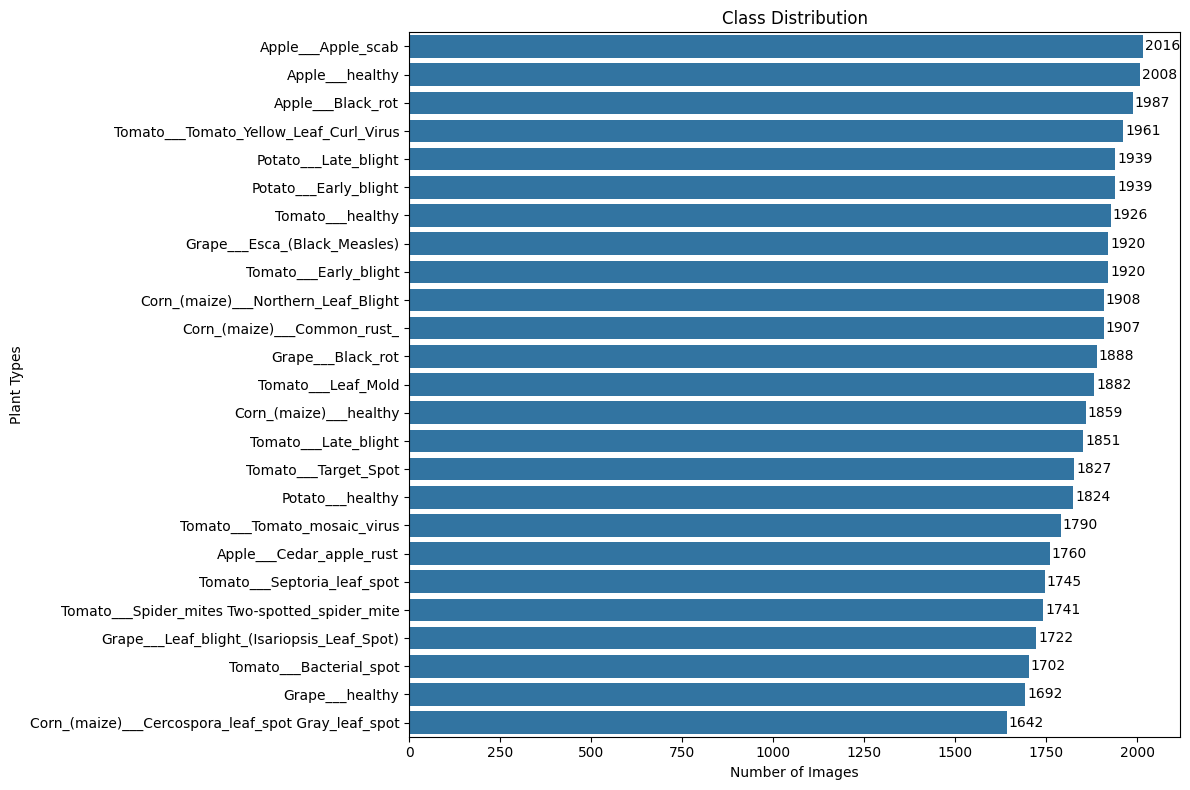

In [11]:
# Visualize class distribution using a horizontal bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=class_counts.values, y=class_counts.index, orient='h')
plt.title('Class Distribution')
plt.xlabel('Number of Images')
plt.ylabel('Plant Types')
plt.tight_layout()  # Adjust the layout to prevent overlapping labels

# Add data labels to each bar
for i, v in enumerate(class_counts.values):
    ax.text(v + 5, i, str(v), color='black', va='center')

plt.show()


In [12]:
# Split the data into training and test sets 80% training, 20% test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [13]:
train_df.shape, test_df.shape

((37084, 2), (9272, 2))

In [14]:
# Split the training data into training and validation sets (80% training, 20% validation)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

In [15]:
train_df.shape, val_df.shape

((29667, 2), (7417, 2))

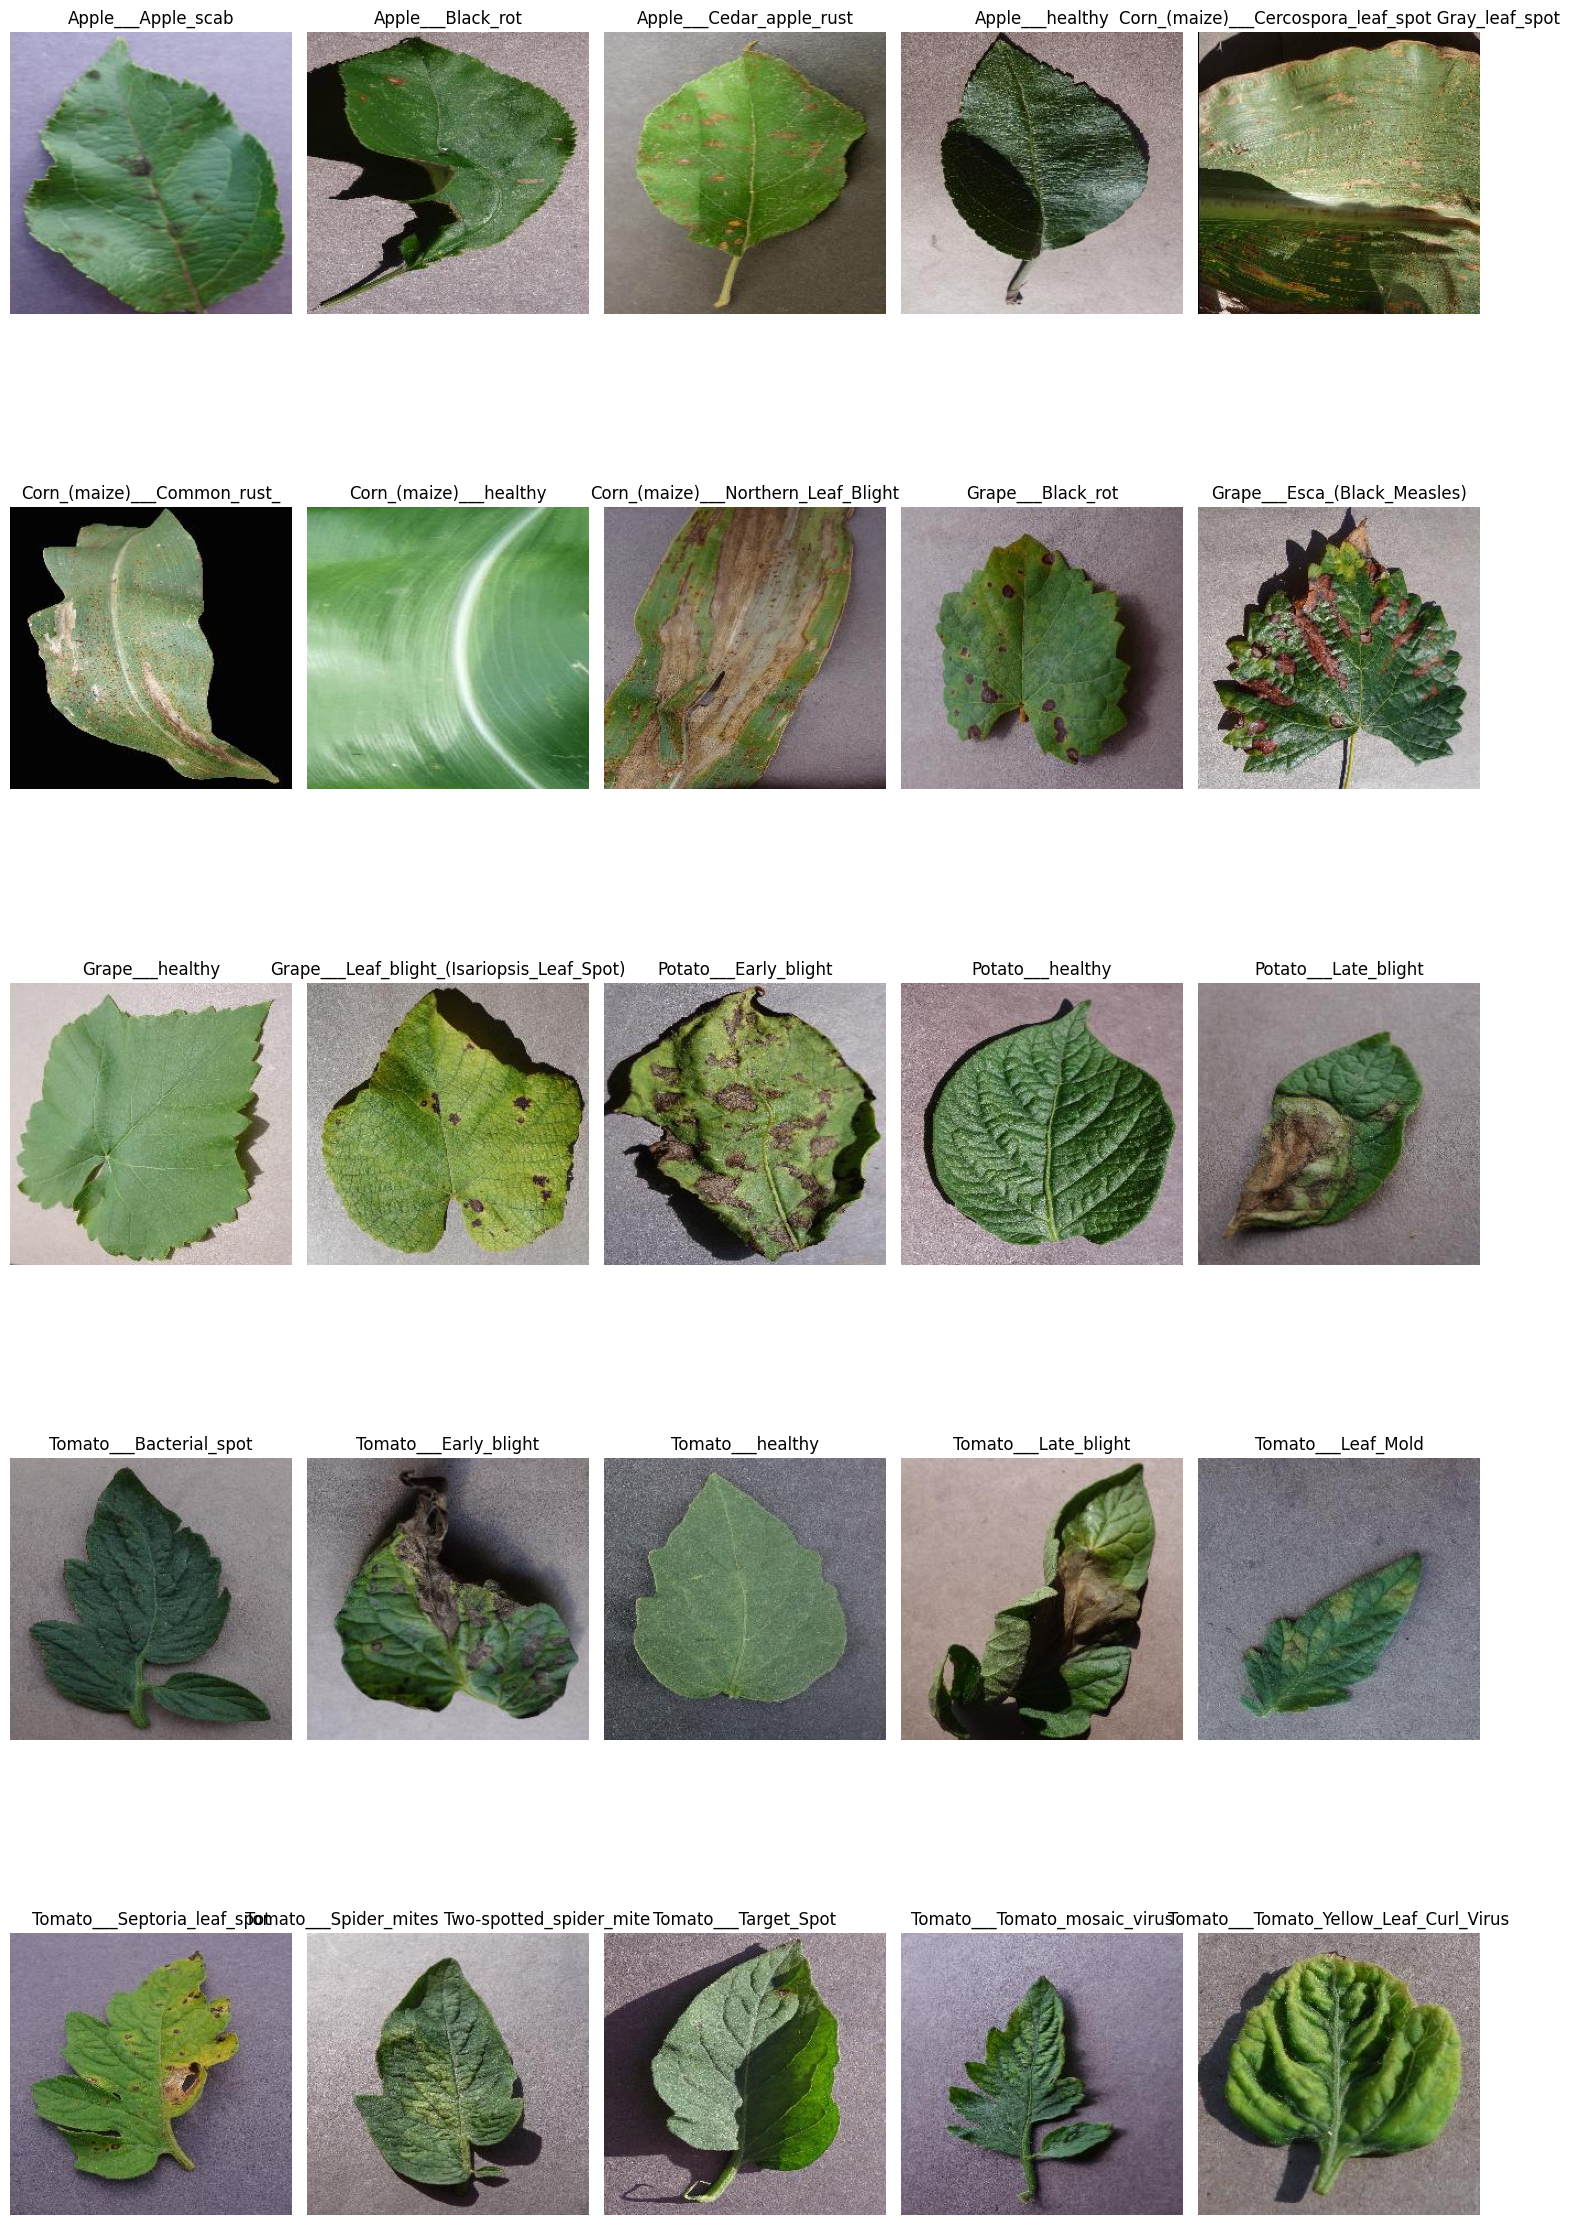

In [21]:
# Display sample images from each class
num_classes = len(df['Labels'].unique())
num_images_per_row = 5
num_rows = (num_classes + num_images_per_row - 1) // num_images_per_row

plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size based on the number of rows

for i, plant_class in enumerate(df['Labels'].unique()):
    plt.subplot(num_rows, num_images_per_row, i + 1)

    # Inside the loop for displaying sample images
    image_path = os.path.join(data_path, df[df['Labels'] == plant_class]['Filepaths'].iloc[0])

    # Check if the image exists and can be loaded
    if os.path.exists(image_path):
        sample_image = cv2.imread(image_path)
        if sample_image is not None:
            plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
            plt.title(plant_class)
            plt.axis('off')
        else:
            print(f"Error: Unable to load image from path: {fseries}")
    else:
        print(f"Error: Image path does not exist: {fseries}")

plt.tight_layout()
plt.show()

In [17]:
#Generate images from dataframe
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for validation and test
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:


# Create flow_from_dataframe generators for train, validation, and test
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepaths',
    y_col='Labels',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    shuffle=False,
    seed=42
)

valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepaths',
    y_col='Labels',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    shuffle=False,
    seed=42
)

test_generator =  test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepaths',
    y_col='Labels',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    shuffle=False,
    seed=42
)

Found 29667 validated image filenames belonging to 25 classes.
Found 7417 validated image filenames belonging to 25 classes.
Found 9272 validated image filenames belonging to 25 classes.


In [18]:
base_model = tf.keras.applications.Xception(weights='imagenet', include_top=False,
                                            input_shape=(224, 224, 3), pooling='avg')
model = Sequential([
    base_model,
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Training Model
model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=1,
    verbose=1
)

156/156 [==============================] - 1888s 12s/step - loss: 0.1947 - accuracy: 0.9421 - val_loss: 0.2993 - val_accuracy: 0.9871


In [19]:
#test (AVG POOL & epochs=1 0) %99.1
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)

49/49 [==============================] - 88s 2s/step - loss: 0.3091 - accuracy: 0.9891
Test Accuracy: 0.9890674948692322


In [20]:
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9890674948692322


In [ ]:
model.save()

In [22]:
import pickle

In [25]:
filename = filename = 'C:/New Volume/project 2k24/project2k24/deployment/models/Potato_Model_VvV2.h5'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved successfully to '{filename}'")

Model saved successfully to 'C:/New Volume/project 2k24/project2k24/deployment/models/Potato_Model_VvV2.h5'
